# Name: 
Syeduzzaman Khan

# Project Title:  
Electricity Demand Forecasting

# 1. Objectives: 
<p style='text-align: justify;'>
The demand for electrical power is growing rapidly. To meet the customer's requirements, the electricity transmission and distribution needs to predict the electricity demands beforehand the transmission line establishment. Previously, the intuitive method has been used to estimate the electricity forecasting. But the rise of machine learning algorithm it becomes available to predict the output in beforehand.
    
</p>
<p style='text-align: justify;'>
Conducting medium- and long-term consumption pattern analysis of major customers can help the electricity providers grasp the changing trends of the future consumption, and thus better formulate the dedicated tariff offers and provide professional services according to various consumer demands. However, it’s computationally costly and impossible to conduct such analysis for every single customer. To overcome this complexity, this project aims to provide an effective solution to group customers into certain number of categories with similar electrical behavior by utilizing clustering techniques.
</p>

<p style='text-align: justify;'>
The electric power generation, transmission, and distribution board work together to supply electricity to the end users. To do so, the transmission and distribution company analyze the power demands so that they can continue the supply without intervention. The calculated demand is sent to several power plants authority by informing their real-time demand.
The potential stakeholders are the electricity transmission and distribution company (e.g. PG&E). This study will help them to predict the customers demand.  
 
</p>

# 2. Data Exploration: 


Read dataset

In [1]:
# Required Library 

import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage, dendrogram
from pandas import DataFrame, Series
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from scipy.cluster.hierarchy import fcluster
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
# read csv file 
df = pd.read_csv("eb.csv")

##  Print top 5 rows, Number of rows, Number of columns, and Percantile

In [3]:
# display top five rows
df.head(5)


,id,kVA,kW,Type,Sector,ServiceID
0,1,0.865936,0.143763,Bank,1,671004572
1,2,0.129804,0.088930,Bank,1,671004572
2,3,0.061801,0.252047,Bank,1,671004572
3,4,0.099116,0.848172,Bank,1,671004572
4,5,0.205704,0.624722,Bank,1,671004572


The dataset table contains six columns. The first column represents the row id. The second to fourth column contains the main dataset for the project. The electricity consumer types is assigned on Type column. Each electricity consumer type associate energy consumption is presented at kVA and kW columns.  


In [4]:
# type of pandas dataframe
type(df)

pandas.core.frame.DataFrame

The dataset is read as Pandas Dataframe.

In [5]:
# display row number

print("Row: ",df.shape[0])

Row:  160


In [6]:
# display column number

print("Column: ",df.shape[1])

Column:  6


The dataset has total 160 rows and 6 columns. 

In [7]:
# Data exploration

#1. Real power (kW)
kW=df.kW # create pandas series from dataframe 
kW.describe() # print different aspects of data 

count    160.000000
mean       0.498754
std        0.281921
min        0.003106
25%        0.237781
50%        0.528282
75%        0.710944
max        0.999933
Name: kW, dtype: float64

The data column 'kW' represents the actual power in electrical power system. The real power unit is kilo-watt. 

In [8]:
#2. apparent  power (kW)
kVA=df.kVA # create pandas series from dataframe 
kVA.describe() # print different aspects of data 

count    160.000000
mean       0.478237
std        0.295968
min        0.004509
25%        0.202408
50%        0.473918
75%        0.731342
max        0.995819
Name: kVA, dtype: float64

The data column 'kVA' represents the apparent power in electrical power system. The real power unit is kilo volt-amps. 

# 3. Data Cleaning: 

In [9]:
# get overview of the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
id           160 non-null int64
kVA          160 non-null float64
kW           160 non-null float64
Type         160 non-null object
Sector       160 non-null int64
ServiceID    160 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 7.6+ KB


In [10]:
# To look into selected column 

kW.describe()

count    160.000000
mean       0.498754
std        0.281921
min        0.003106
25%        0.237781
50%        0.528282
75%        0.710944
max        0.999933
Name: kW, dtype: float64

The real power range seems fine and falls into the regular electrical power. So, there is no need to worry about real power data. 

In [11]:
# To look into selected column 

kVA.describe()

count    160.000000
mean       0.478237
std        0.295968
min        0.004509
25%        0.202408
50%        0.473918
75%        0.731342
max        0.995819
Name: kVA, dtype: float64

There is no anomaly with apparent data. It lies inside the range. 

Energy consumer output data are okay. We do not need to modify those. 

# 4. Adaptation:

In [12]:
# selecting the required columns 

df_new=df.iloc[:,1:4] # new data set with three required columns 
df_new.head(5)

,kVA,kW,Type
0,0.865936,0.143763,Bank
1,0.129804,0.088930,Bank
2,0.061801,0.252047,Bank
3,0.099116,0.848172,Bank
4,0.205704,0.624722,Bank


In [13]:
# another new dataset which includes two columns including their numerical data , this data set is going to use for clustering 

df1=df.iloc[:,1:3] 
df1.head(5)

,kVA,kW
0,0.865936,0.143763
1,0.129804,0.088930
2,0.061801,0.252047
3,0.099116,0.848172
4,0.205704,0.624722


The limitation of my dataset is that it has only six input variables. Those variables are id, apparent power, real power, consumer type, sector, and service id. We want to classify and cluster electricity consumer based on their electricity consumption. The column kVA represents the apparent power usage by consumer. The actual power consumption is shown by kW. The consumer will be used to build clustering associated with their kVA and kW. 



# 5. Descriptive Static Visualization:


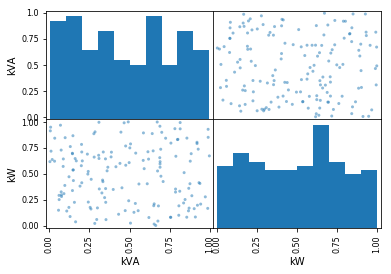

In [14]:
from pandas.plotting import scatter_matrix

#1.  Scatter matrix 

scatter_matrix(df1)
plt.show()

The above figures shows the scatter plot and bar chart of the dataset. 

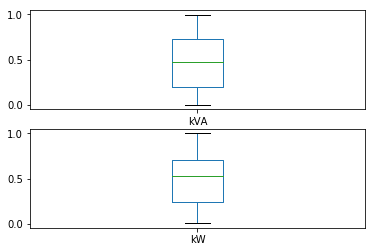

In [15]:
#2.  Box and Whisker Plots
df1.plot(kind='box', subplots=True, layout=(2,1), sharex=False, sharey=False)
plt.show()

We can see that the spread of attributes is quite different. Some like kVA appears quite skewed towards smaller values.

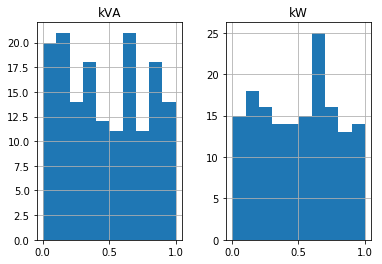

In [16]:
#3.  Histograms
df1.hist()
plt.show()

We can also see that perhaps the kVA and kW attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables

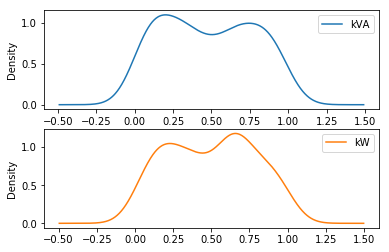

In [17]:
#4. Density plot 
df1.plot(kind='density', subplots=True, layout=(2,1), sharex=False)
plt.show()

Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, much like your eye tried to do with the histograms

# 6. Innovative Visualization: 

Text(0, 0.5, 'Apparent power [kVA]')

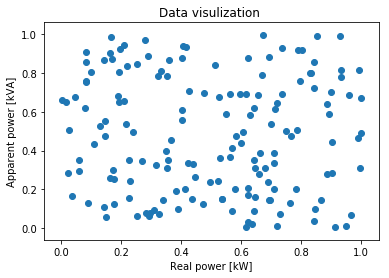

In [18]:
#1 Scatter plot 
plt.scatter(df1.kW, df1.kVA)
plt.title('Data visulization ')
plt.xlabel('Real power [kW]')
plt.ylabel('Apparent power [kVA]')

A scatterplot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. 
Scatter plots are useful for spotting structured relationships between variables, like whether we could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from our dataset

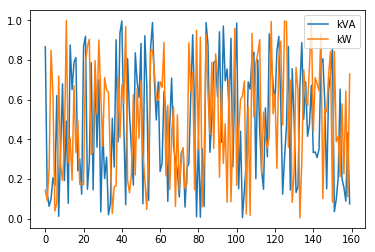

In [19]:
#2 Line plot 
df1.plot()


The above figure shows the line plot of the dataset.

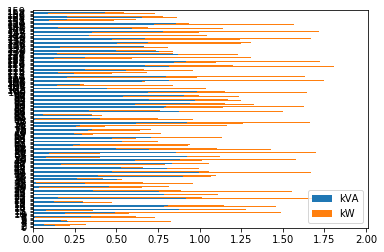

In [20]:
#3 Bar plot 
df1.plot.barh(stacked=True)


The above bar plot explores the dataset values of actual and apparent power consumed by consumers.

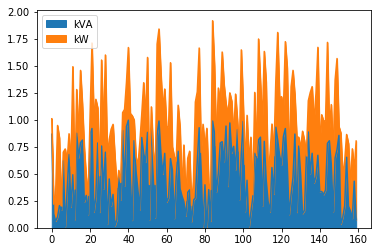

In [21]:
#4 Area plot 
df1.plot.area()


The above plot exhibits the area occupied by the dataset values i.e. kW & kVA.

# 7. Explore Correlations:

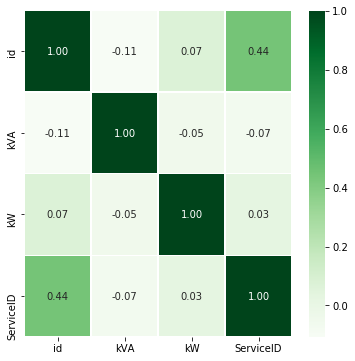

In [22]:
# CORRELATION plot 
df3=df
df3=df3.drop('Sector',axis=1)
plt.figure(figsize=(6,6))
sns.heatmap(df3.corr(),annot=True,cmap="Greens",linewidths=.5,fmt=".2f");

Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If the change in opposite directions together (one goes up, one goes down), then they are negatively correlated.
We can calculate the correlation between each pair of attributes. This is called a correlation matrix. We can then plot the correlation matrix and get an idea of which variables have a high correlation with each other.

We can see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as the top right. This is useful as we can see two different views on the same data in one plot. We can also see that each variable is perfectly positively correlated with each other  in the diagonal line from top left to bottom right. 

In my project, I am not concerned over coorelation matrix. Beacuse the parameter kW and kVA are the primarily responsible parameters for designing the electricity transmission and distribution grid. The relation between kW and kVA is as follows:
<br>
kW=VI *cos($\theta$) <br>
Q=VI* sin($\theta$)<br>

$(kVA)^2$=$(kW)^2$ + $Q^2$<br>

V= voltage<br>
I= Current<br>
$\theta$= Power factor (angle between voltage and current)


# 8. Step-by-step hierarchical clustering:

### Hierarchical clustering using library 

In [32]:
# Hierarchical clustering using library 
k = 3 # number of cluster 
dend_clusters = fcluster(Z, k, criterion = 'maxclust')



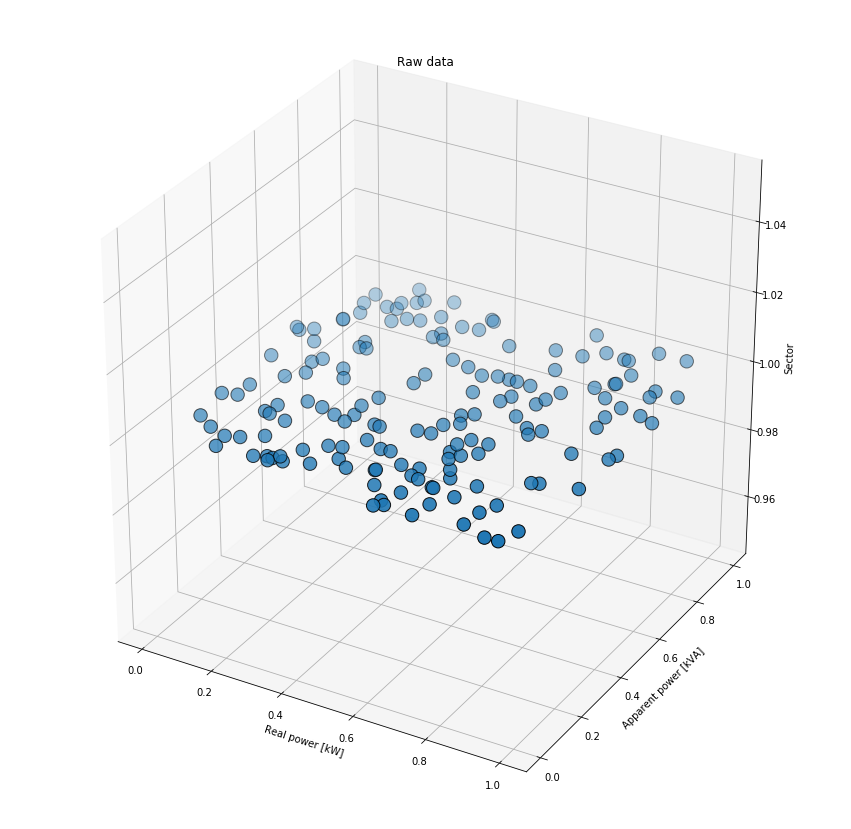

In [33]:
# plot of RAW data using 3D 

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs = df1.kW, ys = df1.kVA, zs = df.Sector,  cmap='viridis',
           s = 180, edgecolor = 'black', depthshade = True)
ax.set_xlabel('Real power [kW]')
ax.set_ylabel('Apparent power [kVA]')
ax.set_zlabel('Sector')
plt.title('Raw data')
plt.show()

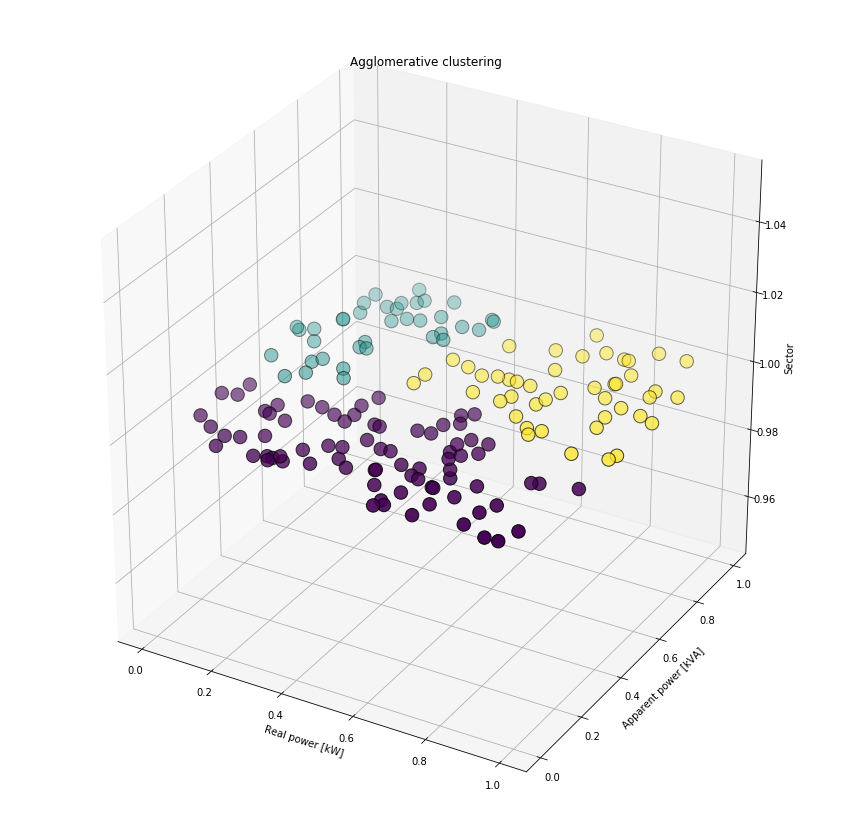

In [34]:
# plot of Hierarchical clustering using 3D 

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs = df1.kW, ys = df1.kVA, zs = df.Sector, c = dend_clusters, cmap='viridis',
           s = 180, edgecolor = 'black', depthshade = True)
    
ax.set_xlabel('Real power [kW]')
ax.set_ylabel('Apparent power [kVA]')
ax.set_zlabel('Sector')
plt.title('Agglomerative clustering')
plt.show()

###  Step-by-step hierarchical clustering (Without Library):

In [35]:
from sklearn.metrics.pairwise import euclidean_distances
data = DataFrame(euclidean_distances(df1))
print("Distance Matrix:")
data.astype(float).head()

Distance Matrix:


,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,0.000000,0.738171,0.811392,1.041251,0.816840,0.709805,0.254325,1.029880,0.536815,0.192703,...,0.062018,1.086750,0.806877,0.716484,0.223603,0.795545,0.713918,0.924750,0.435706,0.984423
1,0.738171,0.000000,0.176725,0.759862,0.541142,0.061222,0.490119,0.640595,0.281589,0.558808,...,0.725471,0.760465,0.301259,0.333214,0.536986,0.494528,0.139448,0.556034,0.302465,0.642328
2,0.811392,0.176725,0.000000,0.597292,0.399493,0.237054,0.584067,0.469149,0.283306,0.620357,...,0.811323,0.591969,0.140834,0.214585,0.592326,0.354372,0.098514,0.392185,0.395695,0.476967
3,1.041251,0.759862,0.597292,0.000000,0.247569,0.812601,0.928350,0.156619,0.626989,0.876380,...,1.075976,0.064961,0.459775,0.446163,0.844001,0.287816,0.625083,0.205115,0.808712,0.121883
4,0.816840,0.541142,0.399493,0.247569,0.000000,0.588033,0.684581,0.215807,0.379799,0.641943,...,0.846006,0.277810,0.260107,0.210614,0.609020,0.046617,0.401965,0.119407,0.561225,0.167696


In [36]:
import random

# cluster=3 

c1 = 0
c2 = 0
c3=0

while c2 == c1 or c2 ==c3:
    c1 = random.randint(0,159)
    c2 = random.randint(0,159)
    c3 = random.randint(0,159)
    
    
# Group to hold all values belongs to specific clusters 
g1 = []
g2 = []
g3 = []

# number of columns= 160 (see the above distance matrix )

for j in range(0,159): # iteration up 160 times 
    
    if c1 == j or c2==j or c3==j: # skip diagonal 
        pass
    
    else:
        if data.iloc[c1][j] > data.iloc[c2][j] or data.iloc[c1][j] > data.iloc[c3][j]:
            g2.append(j) # g2 stores values belongs to cluster 2 
        
        if data.iloc[c2][j] > data.iloc[c1][j] or data.iloc[c2][j] > data.iloc[c3][j]:
            
            g3.append(j) # g3 stores values belongs to cluster 3 
        
        if (data.iloc[c3][j] > data.iloc[c1][j]) or (data.iloc[c3][j] > data.iloc[c2][j]):
        
            g1.append(j) # g1 stores values belongs to cluster 1 



In [37]:
print("             Row Columns")
print ("Cluster 1:  ",g1[10],c1)
print ("Cluster 2:  ",g2[20],c2)
print ("Cluster 3:  ",g3[60],c3)



             Row Columns
Cluster 1:   19 147
Cluster 2:   27 10
Cluster 3:   80 98



# 9. Dendrogram: 

/Users/sayedkhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


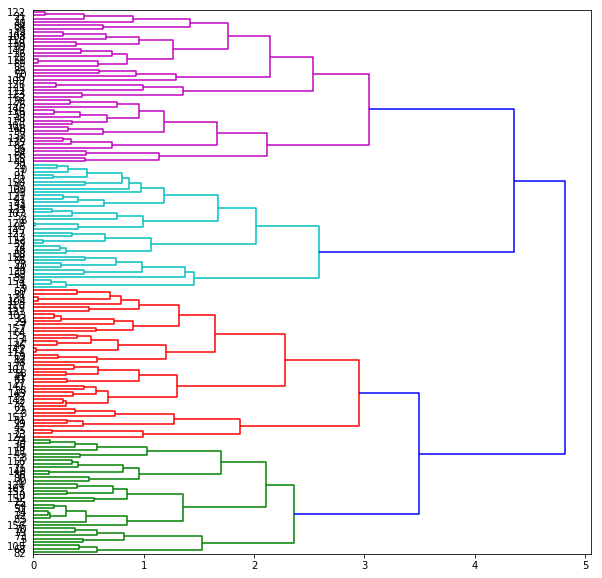

In [38]:
#Dendrogram data 

Dendrogram_data = DataFrame(euclidean_distances(df1))
Z = linkage(Dendrogram_data, 'average')
plt.figure(figsize=(10, 10))
D = dendrogram(Z=Z, orientation="right", leaf_font_size=10)

A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters. The dendrogram above shows the hierarchical clustering. The drawbacks of the dendrogram is that it cannot tell the exact cluster number. It depends on human observation. 
In this project, I have chosen 3 different clusters. 

 # Unsupervised Clustering


# 10. Step-by-step K-means: 

In [40]:
# K means function 

#Euclidian Distance between two d-dimensional points
def eucldist(p0,p1):
    dist = 0.0
    for i in range(0,len(p0)):
        dist += (p0[i] - p1[i])**2
    return math.sqrt(dist)


    
#K-Means Algorithm
def kmeans(k,datapoints):

    # d - Dimensionality of Datapoints
    d = len(datapoints[0]) 
    
    #Limit our iterations
    Max_Iterations = 1000
    i = 0
    
    cluster = [0] * len(datapoints)
    prev_cluster = [-1] * len(datapoints)
    
    #Randomly Choose Centers for the Clusters
    cluster_centers = []
    for i in range(0,k):
        new_cluster = []
        cluster_centers += [random.choice(datapoints)]
        
        
        force_recalculation = False
    
    while (cluster != prev_cluster) or (i > Max_Iterations) or (force_recalculation) :
        
        prev_cluster = list(cluster)
        force_recalculation = False
        i += 1
    
        #Update Point's Cluster Alligiance
        for p in range(0,len(datapoints)):
            min_dist = float("inf")
            
            #Check min_distance against all centers
            for c in range(0,len(cluster_centers)):
                
                dist = eucldist(datapoints[p],cluster_centers[c])
                
                if (dist < min_dist):
                    min_dist = dist  
                    cluster[p] = c   # Reassign Point to new Cluster
        
        
        #Update Cluster's Position
        for k in range(0,len(cluster_centers)):
            new_center = [0] * d
            members = 0
            for p in range(0,len(datapoints)):
                if (cluster[p] == k): #If this point belongs to the cluster
                    for j in range(0,d):
                        new_center[j] += datapoints[p][j]
                    members += 1
            
            for j in range(0,d):
                if members != 0:
                    new_center[j] = new_center[j] / float(members) 
                
                #This means that our initial random assignment was poorly chosen
                #Change it to a new datapoint to actually force k clusters
                else: 
                    new_center = random.choice(datapoints)
                    force_recalculation = True
                    
            
            cluster_centers[k] = new_center
    
        
    print ("Clusters:\n", cluster_centers)
    print ("\n Iterations: \n",i)
    
    return cluster_centers # cluster center 


k = 5 # K - Number of Clusters
      
X=kmeans(k,df1.values) # call function : I/P k & dataframe


Clusters:
 [[0.7171553552926831, 0.7679709917560976], [0.3732257194347826, 0.18745891865217393], [0.15897457879166668, 0.36030812179166666], [0.21040897197435898, 0.7177136005128206], [0.8033052310606063, 0.22315353981818176]]

 Iterations: 
 11


The K means algorithm return the cluster center points and prints the required iterations to be converged.

Text(0, 0.5, 'Apparent power [kVA]')

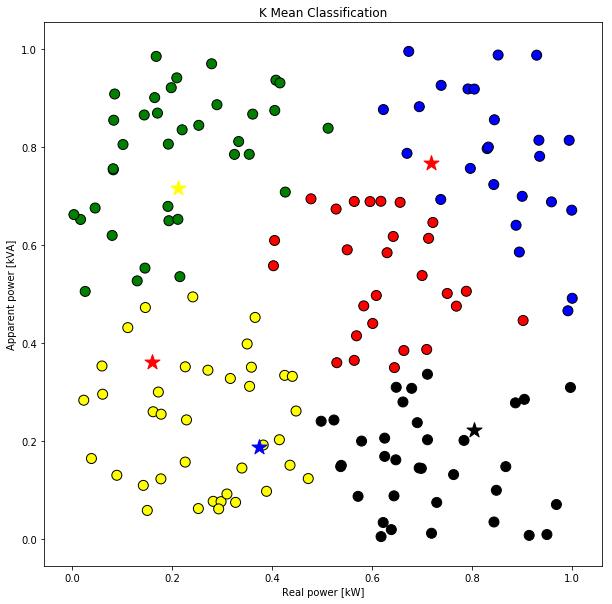

In [43]:
# plot the cluster 

fig = plt.figure(figsize=(10, 10))
 
# Create a colormap
colormap = np.array(['green', 'red','yellow','blue','black'])
 
plt.scatter(df1.kW, df1.kVA, c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.scatter(X[0][0],X[0][1],c=colormap[1], marker='*',s =250)
plt.scatter(X[1][0],X[1][1], c=colormap[3],marker='*',s =250)
plt.scatter(X[2][0],X[2][1],c=colormap[1], marker='*',s =250)
plt.scatter(X[3][0],X[3][1],c=colormap[2], marker='*',s =250)
plt.scatter(X[4][0],X[4][1],c=colormap[4], marker='*',s =250)

#plt.scatter(0.6247028527272735,0.522413309090907,c=colormap[4], marker='*',s =150)
#plt.scatter(0.7879536774705884,0.19949601385294113,c=colormap[3], marker='*',s =150)

plt.title('K Mean Classification')
plt.xlabel('Real power [kW]')
plt.ylabel('Apparent power [kVA]')

The above plot shows the K means cluster. I have used different colors for markers so that it could easily seperable from data points. 

# 11. k-Means using sklearn.cluster:

In [44]:
# K Means Cluster
model = KMeans(n_clusters = 5)
kmeans=model.fit(df1)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([2, 0, 0, 4, 4, 0, 2, 4, 0, 2, 0, 3, 0, 2, 2, 1, 2, 4, 0, 0, 2, 1,
       4, 3, 2, 0, 1, 3, 1, 4, 0, 4, 3, 4, 0, 2, 0, 2, 3, 2, 1, 3, 4, 2,
       2, 0, 4, 2, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 3, 1, 4, 4, 1, 2, 4, 0,
       2, 3, 0, 4, 0, 0, 0, 0, 0, 3, 1, 1, 2, 4, 0, 4, 0, 0, 1, 1, 0, 3,
       2, 1, 1, 2, 3, 2, 2, 2, 3, 2, 0, 1, 2, 0, 3, 4, 4, 0, 1, 2, 1, 1,
       4, 1, 3, 0, 4, 2, 0, 2, 1, 1, 3, 2, 1, 3, 4, 3, 3, 2, 4, 2, 0, 4,
       4, 2, 2, 3, 1, 3, 3, 1, 0, 3, 3, 3, 1, 2, 3, 4, 1, 1, 2, 4, 0, 0,
       2, 4, 0, 4, 0, 4], dtype=int32)

'labels' is created for using supervised learning. My dataset does not have classification columns. So, I have created it using kmeans output.

Text(0, 0.5, 'Apparent power [kVA]')

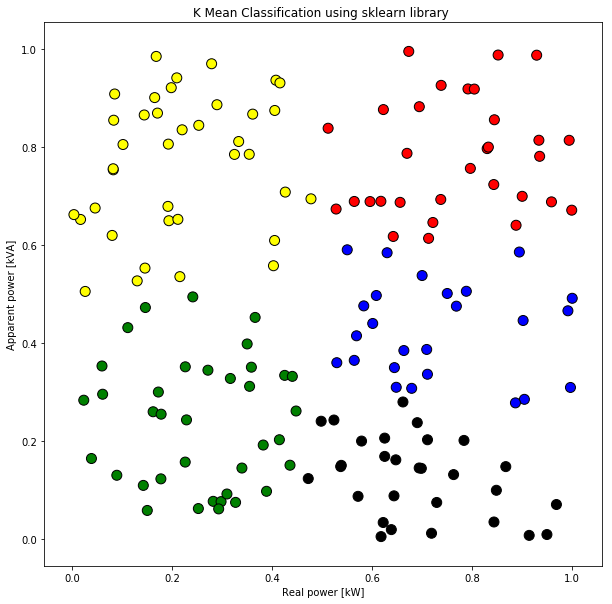

In [45]:
# Plot k means claasification for k=5

fig = plt.figure(figsize=(10, 10))
 
# Create a colormap
colormap = np.array(['green', 'red','yellow','blue','black'])
 
plt.scatter(df1.kW, df1.kVA, c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.title('K Mean Classification using sklearn library ')
plt.xlabel('Real power [kW]')
plt.ylabel('Apparent power [kVA]')

The above plot shows the K means cluster. I have used different colors for markers so that it could easily seperable from data points. 

#### Mesh Plot 

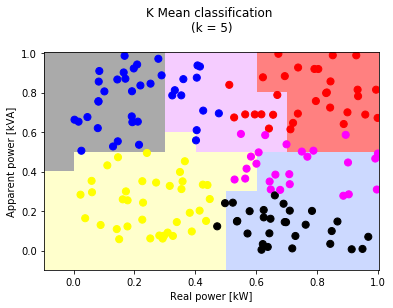

In [46]:
def plotMesh():
    h = 0.1
    # Create color maps
    cmap_light = ListedColormap(['#ffffcc', '#ff8080','#ccd9ff','#f5ccff','#aaaaaa'])
    colormap = np.array(['yellow', 'red', 'blue','magenta','black'])

    x_min, x_max = df.kW.min()-0.10, df.kVA.max()+0.10
    y_min, y_max = df.kW.min() -0.10, df.kVA.max()+0.10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Plot also the training points
    plt.scatter(df1.kW, df1.kVA, c = colormap[model.labels_],s = 50)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("K Mean classification \n(k = %i)\n" % (5))
    plt.xlabel('Real power [kW]')
    plt.ylabel('Apparent power [kVA]')
    
plotMesh()

The above plot shows the k-means mesh plot. For k=5 clusters, it is plotted with 5 different sections. 

#### Prediction using k-means 

In [47]:
# Prediction function

def pred():
        colormap = np.array(['yellow', 'red', 'blue','magenta','black'])

        kW = float(input('User real power consumation (kW): '))
        kVA = float(input('User apparent power consumation (kVA): '))

        data_class = model.predict(np.array([kW, kVA]).reshape(1,-1))[0]
        if colormap[data_class]=='yellow':
        #Student likes the veggie food too much. Based on the cluster, he probably likes the Indian food to
            #print("  You will get $2 coupon ")
            print('Prediction: User group #', data_class, colormap[data_class])
        if colormap[data_class]=='red':
        #Student does not like the veggie food too much. Based on the cluster, he probably does not likes the Indian food to
            print('Prediction: User group #', data_class, colormap[data_class])   
            
        if colormap[data_class]=='blue':
        #Student likes the veggie food too much. Based on the cluster, he probably does not likes the Indian food to
            print('Prediction: User group #', data_class, colormap[data_class]) 
        if colormap[data_class]=='magenta':
        #Student likes the veggie food too much. Based on the cluster, he probably does not likes the Indian food to
            print('Prediction: User group #', data_class, colormap[data_class])   
        if colormap[data_class]=='black':
        #Student likes the veggie food too much. Based on the cluster, he probably does not likes the Indian food to
            print('Prediction: User group #', data_class, colormap[data_class])   
                

pred()

User real power consumation (kW): 0.1
User apparent power consumation (kVA): 0.1
Prediction: User group # 0 yellow


 # Supervised Clustering



# 12. kNN Function:

In [48]:
# kNN using library 

knn = KNeighborsClassifier(n_neighbors = 5, p =2 )# p=2 for euclidean distance
knn.fit(df1[["kW", "kVA"]], labels) # labels from k-means 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### mesh plot 

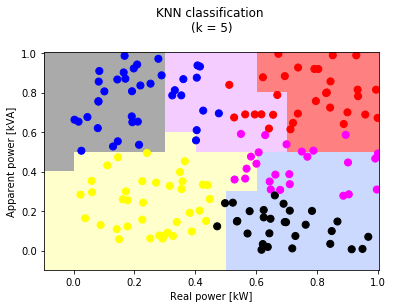

In [49]:
def plotMesh():
    h = 0.1
    # Create color maps
    cmap_light = ListedColormap(['#ffffcc', '#ff8080','#ccd9ff','#f5ccff','#aaaaaa'])
    colormap = np.array(['yellow', 'red', 'blue','magenta','black'])

    x_min, x_max = df.kW.min()-0.1, df.kVA.max()+0.1 
    y_min, y_max = df.kW.min() -0.1, df.kVA.max()+0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
   
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Plot also the training points
    plt.scatter(df1.kW, df1.kVA, c = colormap[model.labels_],s = 50)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("KNN classification \n(k = %i)\n " % (5))
    plt.xlabel('Real power [kW]')
    plt.ylabel('Apparent power [kVA]')
    
plotMesh()

The above plot shows the kNN mesh plot. For k=5 clusters, it is plotted with 5 different sections. 

### Prediction 

User real power consumation (kW): 0.1
User apparent power consumation (kVA): 0.1
Prediction: User group # 0 yellow


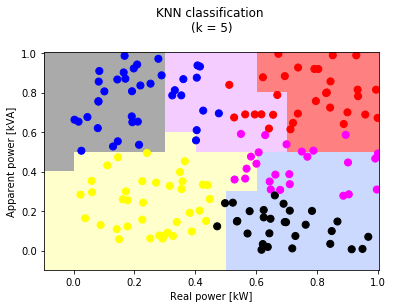

In [50]:
# make prediction
def predictKNN(k,kW,kVA):

        
        data_class = knn.predict(np.array([kW, kVA]).reshape(1, -1))[0]
        class_name = ['yellow', 'red', 'blue','magenta','black','NA']

        print('Prediction: User group #', data_class, class_name[data_class])
        knn.fit(df1[["kW", "kVA"]],labels )


# Input from user 
k=5 # cluster number: fixed 
kW = float(input('User real power consumation (kW): '))
kVA = float(input('User apparent power consumation (kVA): '))
predictKNN(k,kW,kVA)        
plotMesh()

# 13.  Project Report

<font size="5"> Introduction: </font>


 

The demand of electricity has been increasing day by day. To meet up the power demand, the need of set up electricity transmission grid is necessary as well as it is necessary to operate the existing power grid in efficient way. Because the setup and operating cost of power grid are high. If power grid does not operate at highly efficient way, the operating cost will increase that will affect profit maximization. 

 

In our project, we have used the dataset of various electric power consumers. The power consumption varies individual households to industry. Based on the power consumption, it is possible to classify the consumers.

 

The power plant produces the electricity. The generated power is transmitted and distributed by transmission and distribution company i.e. PG & E. The power producing company (power plant) produces electrical power in according to the actual demand by transmission and distribution company. The company like PG & E calculates the real time load using old data. Then, transmission and distribution company send their actual demand to the power plant.

 

 

 
<font size="5"> Objectives:</font>




The objective of this study is to build machine learning model to forecast the electricity demand. There are existing methods that we can use to predict the electricity demand. For example, the analytical model requires to solve several linear and non-linear equations. To solve those equation, it requires huge computational power and time. Therefore, machine learning is another alternative approach to predict the output power. The machine learning method analyzes the arbitrary input and output based on correlation. 

 
<font size="5"> Dataset: </font>



 

Our dataset contains six columns and near 10000 rows those are collected from various consumer i.e. Bank, Industry, Households.Dataset may contain irrelevant data. We need to get rid of those data. We have analyzed each parameter data range and found reasonable. To construct a efficient model, we need to select several parameters. For this project, we have selected kW and kVA for further investigation. We can see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as the top right. This is useful as we can see two different views on the same data in one plot. We can also see that each variable is perfectly positively correlated with each other in the diagonal line from top left to bottom right.

 
<font size="5"> Predictive Model: </font>


 

 

The possibility to build a predictive model using classification and clustering in machine learning is huge. Basically, classification and clustering algorithms are divided into two main groups: Supervised learning and Unsupervised learning. <br>

 

In this project, we will investigate our predictive model using both supervised and unsupervised learning.

 

In the following paragraph, we will discuss the building of predictive model as well as the effects of different variables on the model. <br>

 

 

Unsupervised learning:The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data. In the following, We have adapted two popular unsupervised machine learning for building model.<br> 

 

 

Hierarchical Clustering Model:<br>

 

Hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types: Agglomerative and Divisive. For this we have concentrated on Agglomerative clustering technique. The agglomerative clustering  is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

The results of hierarchical clustering is presented in a dendrogram (see section 8).

 

 

k-means Clustering: <br>

 

K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

 

The machine learning model cannot identify the number of cluster automatically. Therefore, human plays an essential role in machine learning. In our project, we have used 3 clusters for Hierarchical and k=5 for both k-means and KNN clustering. <br>

 

k-means clustering has been implemented using without library and using sklearn library. Both cases, the results are almost identical. Each cluster is plotted with different colors to make it visually appealing. Also, 2D mesh plot and prediction function have implemented. The prediction model takes input: kW and kVA variables from user. Based on those data, it predicts the oncoming consumers groups (see section 10 and 11 for more details). <br>

 

Supervised learning: It infers a function from labeled training data consisting of a set of training examples.[2] In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples (source: https://en.wikipedia.org/wiki/Supervised_learning).<br>

 

There are several supervised algorithms existing. In this project, we have adapted k-nearest neighbors algorithm (k-NN) for building prediction model.<br>

 

KNN Clustering: <br>

 

KNN uses label data to make prediction. In our dataset, it does not have any label data columns. Therefore, the output of k-means algorithm has used as label data to build the model using predefined library.<br>

 

Total 5 cluster has been made from our dataset. Each cluster is depicted with different color. Also, 2D mesh plot and prediction function have implemented. The prediction model takes input: kW and kVA variables from user. Based on those data, it predicts the oncoming consumers groups (see section 12 for more details). <br>

 

 

 <font size="5"> Conclusion:</font>



 

The aim of this study is to investigate efficient machine learning methods for predicting electricity power demands. Both supervised and unsupervised machine learning model are capable to make prediction on energy demands. The predictive model has been tested with training dataset. It can predict the output based on their cluster.<br>

 

The predictive model will be helpful for electricity transmission and distribution company to predict electricity demand on real time. Based on the output data, they can implement a efficient smart grid.

